In [59]:
import numpy as np
import cvxpy as cp
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats
import scipy.linalg

from constrained_gp.py import ConstrainedGP
from RSM import RsmSampler
from rtmg import py_rtmg
from GibbsSampler import gibbs

# 1D case

In [5]:
def title(constraint):
    increasing = constraint['increasing']
    convex = constraint['convex']
    bounded = len(constraint['bounded']) > 0

    if increasing and not convex and not bounded:
        title = 'Monotonicity'
    elif increasing and not convex and bounded:
        title = 'Monotonicity and boundedness'
    elif increasing and convex and not bounded:
        title = 'Monotonicity and convexity'
    elif increasing and convex and bounded:
        title = 'Monotonicity, boundedness and convexity'
    elif not increasing and not convex and bounded:
        title = 'Boundedness'
    elif not increasing and convex and not bounded:
        title = 'Convexity'
    elif not increasing and convex and bounded:
        title = 'Convexity and boundedness'
    else:
        title = 'Unconstrained'
    return title

In [6]:
def plot_fig2(constraints, sampling_method, n=100, burn_in=100):    

    Gp = ConstrainedGP(m=30, constraints=constraints)
    rv = norm()

    def f(x):
        return rv.cdf((x - 0.5) / 0.2)
    x_train = np.array([0.25, 0.5, 0.75])
  
    y_train = f(x_train)
    samples = Gp.fit_gp(x_train, y_train, n=100, burn_in=100, alpha=0.0000001,
                        verbose=False, method=sampling_method)

    t = np.arange(0, 1 + 0.01, 0.01)
    y_true = f(t)

    Gp.mean_var(t)

    y_pred = Gp.mean
    ci_l, ci_u = Gp.confidence_interval()

    fig, axis = plt.subplots()
    axis.plot(t, y_true, 'r', label="true function")
    axis.plot(t, y_pred, 'b', label="sample")
    axis.fill_between(t, ci_l, ci_u, color='lightgrey')
    axis.plot(x_train, y_train, 'ko', label="training points")
    axis.set_xlim(0., 1.)
    axis.set_ylim(0., 1.)
    axis.set_xlabel('x')
    axis.set_ylabel('y(x)')
    axis.legend(loc='upper left')
    axis.set_title(title(constraints)+',method: ' + sampling_method)

    plt.show()

# sampling_method: 

`RHMC` : HMC by calling R function, can generate correct results. 

`HMC` : HMC

`MH` : Metropolis-Hasting. Use rejection sampling to propose new state which satisfies the 
constraints.

`Gibbs` : Gibbs sampling, sample each variable in turn conditional on the values of the other ones. 
Therefore, sampling from a truncated multinormal is reduced to sampling sequentially from conditional truncated
(univariate) normals.

The rejection method for both monotonicity and increasing case takes so long that `MH` fails at this situation,
and in Table 1 in the paper, there is no data for this case in `MH` and `RSM` either.

In [29]:
constraints = {'increasing': False, 'bounded': [], 'convex': False}
sampling_method = 'RHMC'

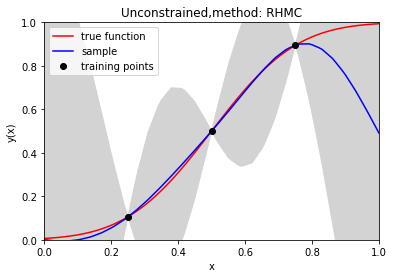

In [36]:
plot_fig2({'increasing': False, 'bounded': [], 'convex': False}, 'RHMC')

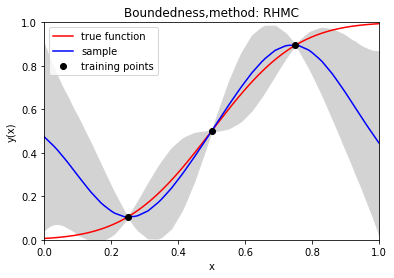

In [37]:
plot_fig2({'increasing': False, 'bounded': [0, 1], 'convex': False}, 'RHMC')

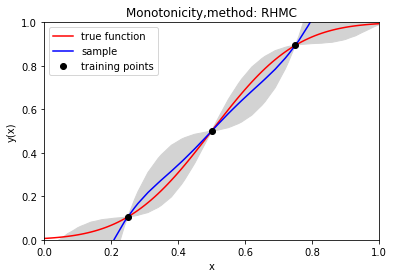

In [38]:
plot_fig2({'increasing': True, 'bounded': [], 'convex': False}, 'RHMC')

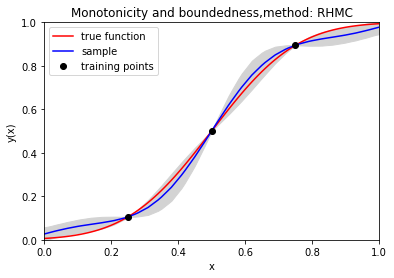

In [39]:
plot_fig2({'increasing': True, 'bounded': [0, 1], 'convex': False}, 'RHMC')

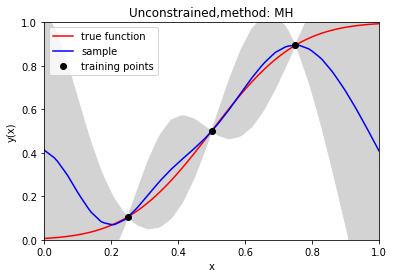

In [11]:
plot_fig2({'increasing': False, 'bounded': [], 'convex': False}, 'MH', n = 1000, burn_in=300)

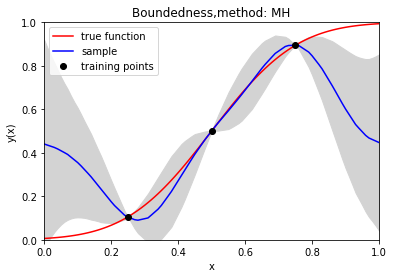

In [10]:
plot_fig2({'increasing': False, 'bounded': [0, 1], 'convex': False}, 'MH', n = 1000, burn_in=300)

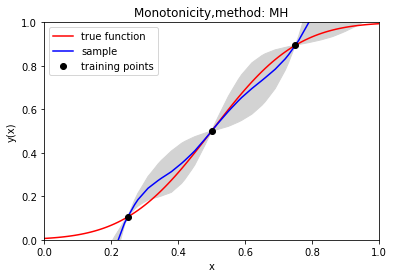

In [13]:
plot_fig2({'increasing': True, 'bounded': [], 'convex': False}, 'MH', n = 1000, burn_in=300)

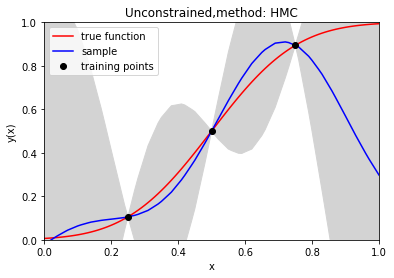

In [52]:
plot_fig2({'increasing': False, 'bounded': [], 'convex': False}, 'HMC')

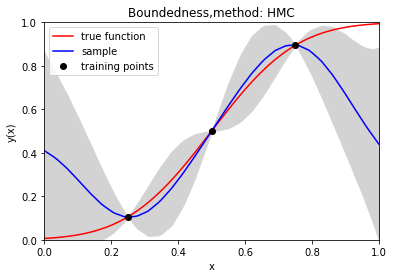

In [53]:
plot_fig2({'increasing': False, 'bounded': [0, 1], 'convex': False}, 'HMC')

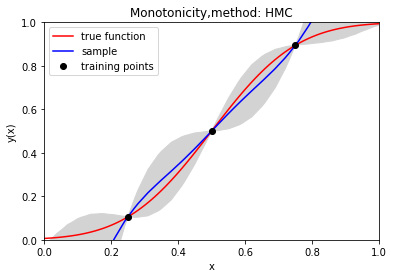

In [54]:
plot_fig2({'increasing': True, 'bounded': [], 'convex': False}, 'HMC')

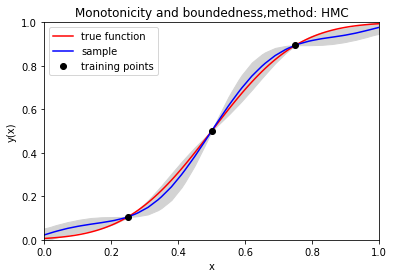

In [55]:
plot_fig2({'increasing': True, 'bounded': [0, 1], 'convex': False}, 'HMC')

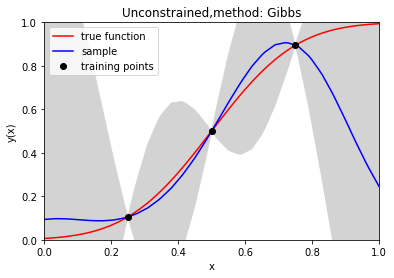

In [60]:
plot_fig2({'increasing': False, 'bounded': [], 'convex': False}, 'Gibbs')

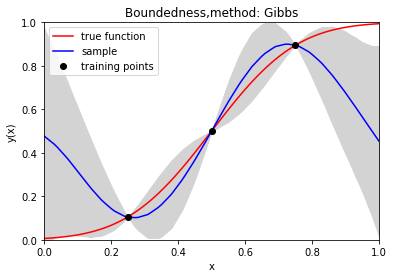

In [61]:
plot_fig2({'increasing': False, 'bounded': [0, 1], 'convex': False}, 'Gibbs')

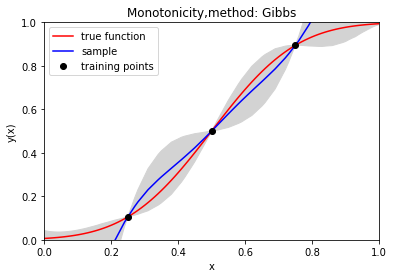

In [62]:
plot_fig2({'increasing': True, 'bounded': [], 'convex': False}, 'Gibbs')

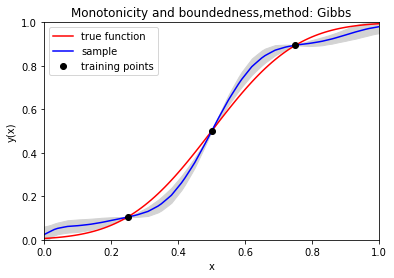

In [63]:
plot_fig2({'increasing': True, 'bounded': [0, 1], 'convex': False}, 'Gibbs')

In [45]:
A = np.random.normal(0,1,(30,30))
A = A.T*A
A = A+10*np.eye(30)

In [47]:
R1 = np.linalg.cholesky(A)
R2 = scipy.linalg.cholesky(A)

In [50]:
np.linalg.norm(A-R1@R1.T)

1.3507835908778205e-14

In [49]:
np.linalg.norm(A-R2@R2.T)

21.190975041336735

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [20]:
def f(x1, x2):
    return np.arctan(5*x1)+np.arctan(x2)

In [8]:
X = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, X)
Z = f(X, Y)

In [23]:
x = np.arange(0, 1.1, 0.2)
y = np.arange(0, 1.1, 0.2)
x, y = np.meshgrid(x, y)
z_train = f(x,y)

Text(0.5, 0, 'y(x1,x2)')

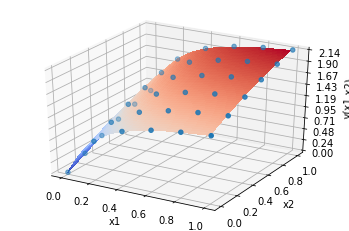

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(0, np.pi-1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.scatter(x, y, z_train)

# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y(x1,x2)')


# plt.show()